### Survival Analysis

In [1]:
#!pip install lifelines

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import proportional_hazard_test
from lifelines import WeibullFitter,WeibullAFTFitter,ExponentialFitter,LogNormalFitter,LogLogisticFitter

In [50]:
sns.set_theme(style="darkgrid")

In [51]:
lung_data = pd.read_csv('lung.csv', index_col=0)

In [52]:
lung_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 228 entries, 3.0 to 22.0
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       228 non-null    int64  
 1   status     228 non-null    int64  
 2   age        228 non-null    int64  
 3   sex        228 non-null    int64  
 4   ph.ecog    227 non-null    float64
 5   ph.karno   227 non-null    float64
 6   pat.karno  225 non-null    float64
 7   meal.cal   181 non-null    float64
 8   wt.loss    214 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 17.8 KB


In [53]:
lung_data.describe()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,305.232456,0.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,5.000000,0.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,166.750000,0.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,255.500000,1.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,396.500000,1.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,1022.000000,1.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


In [54]:
lung_data.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
inst,,,,,,,,,
3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [55]:
lung_data.shape, lung_data.dtypes, lung_data.columns

((228, 9),
 time           int64
 status         int64
 age            int64
 sex            int64
 ph.ecog      float64
 ph.karno     float64
 pat.karno    float64
 meal.cal     float64
 wt.loss      float64
 dtype: object,
 Index(['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno', 'pat.karno',
        'meal.cal', 'wt.loss'],
       dtype='object'))

In [56]:
lung_data = lung_data[['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss']]
lung_data['status'] = lung_data['status'] - 1
lung_data['sex'] = lung_data['sex'] - 1
lung_data.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
inst,,,,,,,,,
3.0,306,0,74,0,1.0,90.0,100.0,1175.0,NaN
3.0,455,0,68,0,0.0,90.0,90.0,1225.0,15.0
3.0,1010,-1,56,0,0.0,90.0,90.0,NaN,15.0
5.0,210,0,57,0,1.0,90.0,60.0,1150.0,11.0
1.0,883,0,60,0,0.0,100.0,90.0,NaN,0.0


In [57]:
lung_data.isnull().sum()

time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

In [58]:
lung_data['ph.karno'].fillna(lung_data['ph.karno'].mean(), inplace=True)
lung_data['pat.karno'].fillna(lung_data['pat.karno'].mean(), inplace=True)
lung_data['meal.cal'].fillna(lung_data['meal.cal'].mean(), inplace=True)
lung_data['wt.loss'].fillna(lung_data['wt.loss'].mean(), inplace=True)
lung_data['ph.ecog'].fillna(lung_data['ph.ecog'].mean(), inplace=True)

In [59]:
lung_data.dropna(inplace=True)

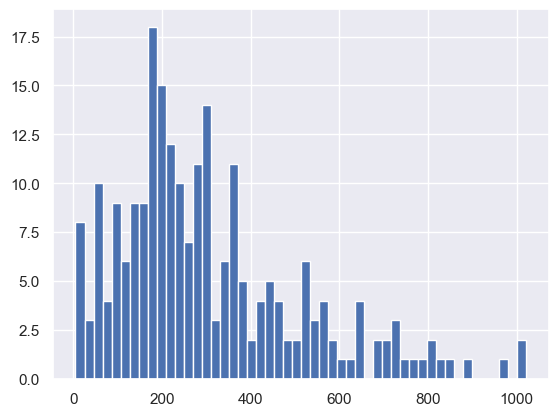

In [60]:
T = lung_data['time']
E = lung_data['status']
plt.hist(T, bins = 50)
plt.show()

### Kaplan Meier Model (Non Parametric)

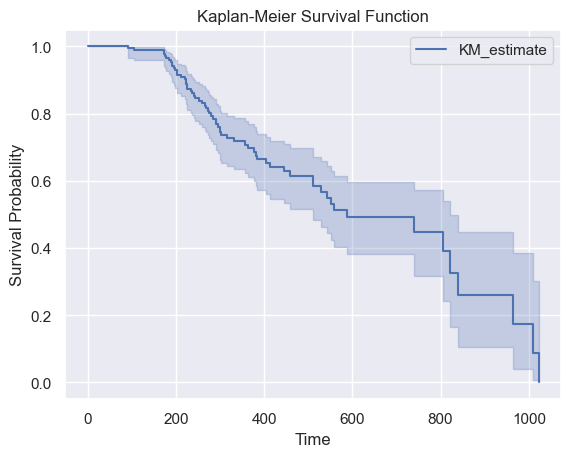

In [61]:
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

# Plot the survival function
kmf.plot_survival_function()
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Function')
plt.show()

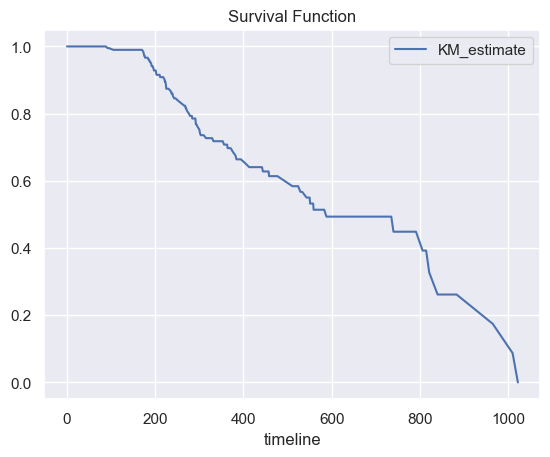

In [62]:
kmf.survival_function_.plot()
plt.title('Survival Function')
plt.show()

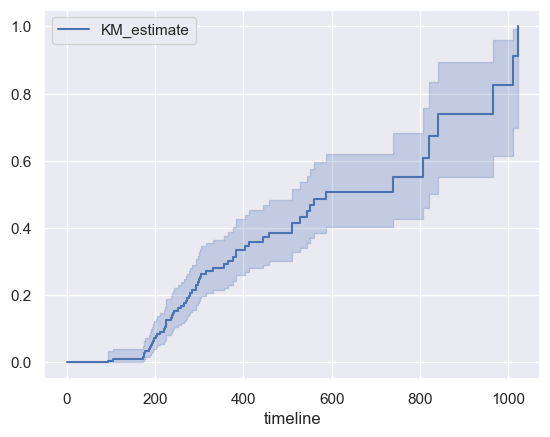

In [63]:
kmf.plot_cumulative_density()
plt.show()

In [64]:
kmf.median_survival_time_

588.0

In [65]:
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

588.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   511.0                   821.0


In [66]:
lung_data

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
inst,,,,,,,,,
3.0,306,0,74,0,1.0,90.0,100.0,1175.000000,9.831776
3.0,455,0,68,0,0.0,90.0,90.0,1225.000000,15.000000
3.0,1010,-1,56,0,0.0,90.0,90.0,928.779006,15.000000
5.0,210,0,57,0,1.0,90.0,60.0,1150.000000,11.000000
1.0,883,0,60,0,0.0,100.0,90.0,928.779006,0.000000
...,...,...,...,...,...,...,...,...,...
1.0,188,-1,77,0,1.0,80.0,60.0,928.779006,3.000000
13.0,191,-1,39,0,0.0,90.0,90.0,2350.000000,-5.000000
32.0,105,-1,75,1,2.0,60.0,70.0,1025.000000,5.000000


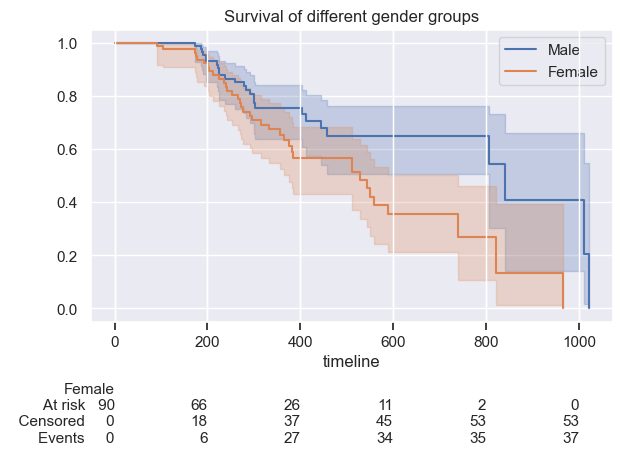

In [67]:
ax = plt.subplot(1, 1, 1)  # Create a single plot

m = (lung_data['sex'] == 0)
kmf = KaplanMeierFitter()

kmf.fit(durations=T[m], event_observed=E[m], label='Male')
kmf.plot_survival_function(ax=ax)

kmf.fit(durations=T[~m], event_observed=E[~m], label='Female')
kmf.plot_survival_function(ax=ax, at_risk_counts=True)

plt.title('Survival of different gender groups')
plt.show()

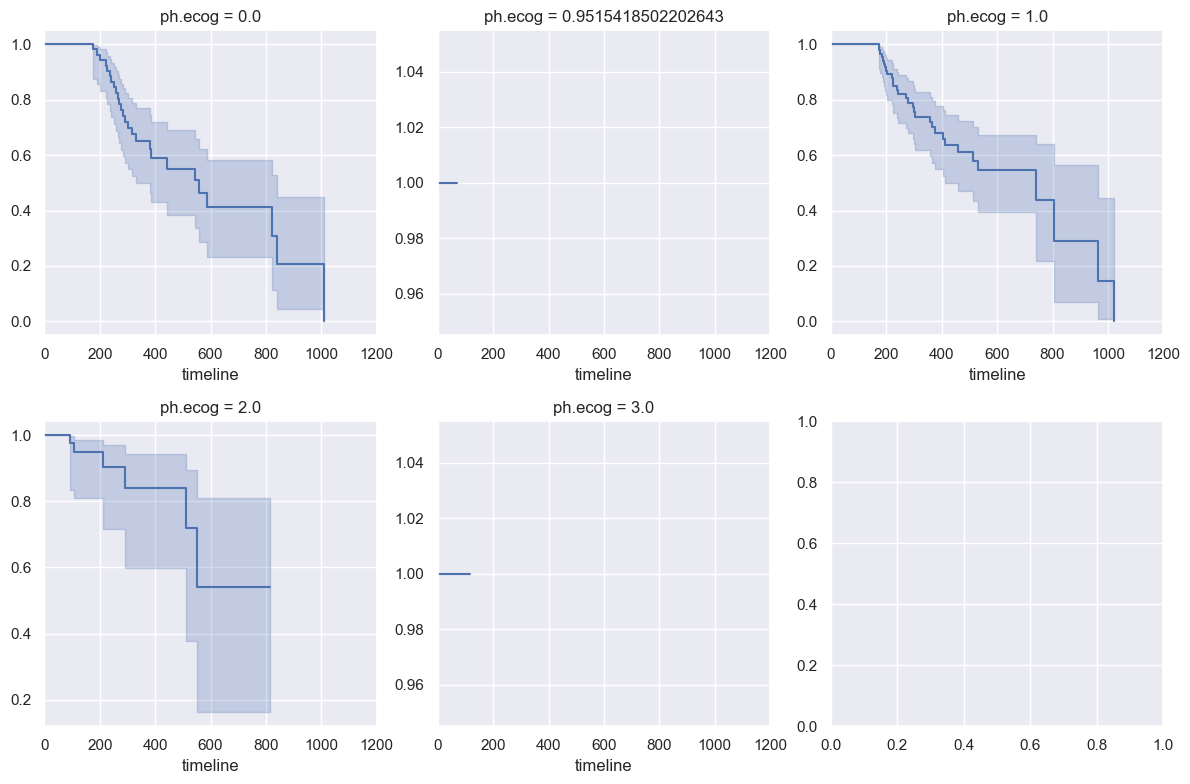

In [68]:
ecog_type = lung_data.sort_values(by=['ph.ecog'])['ph.ecog'].unique()
num_subplots = len(ecog_type)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ecog_type_value in enumerate(ecog_type):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ix = lung_data['ph.ecog'] == ecog_type_value
    kmf = KaplanMeierFitter()
    kmf.fit(T[ix], E[ix], label=ecog_type_value)
    kmf.plot_survival_function(ax=ax, legend=False)
    ax.set_title(f'ph.ecog = {ecog_type_value}')
    ax.set_xlim(0, 1200)

plt.tight_layout()
plt.show()

In [43]:
lung_data['ph.ecog'].value_counts()

1.000000    113
0.000000     63
2.000000     50
0.951542      1
3.000000      1
Name: ph.ecog, dtype: int64

In [69]:
lung_data = lung_data[lung_data['ph.ecog'] !=0.9515418502202643]
lung_data = lung_data[lung_data['ph.ecog'] !=3.0]

In [70]:
lung_data['ph.ecog'].value_counts()

1.0    113
0.0     63
2.0     50
Name: ph.ecog, dtype: int64

### Fitting Cox Proportional Hazard Model (Semi Parametric)

In [71]:
lung_data.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
inst,,,,,,,,,
3.0,306,0,74,0,1.0,90.0,100.0,1175.000000,9.831776
3.0,455,0,68,0,0.0,90.0,90.0,1225.000000,15.000000
3.0,1010,-1,56,0,0.0,90.0,90.0,928.779006,15.000000
5.0,210,0,57,0,1.0,90.0,60.0,1150.000000,11.000000
1.0,883,0,60,0,0.0,100.0,90.0,928.779006,0.000000


In [72]:
dummies_ecogs = pd.get_dummies(lung_data['ph.ecog'], prefix = 'ecog')
dummies_ecogs.head(4)

,ecog_0.0,ecog_1.0,ecog_2.0
inst,,,
3.0,0,1,0
3.0,1,0,0
3.0,1,0,0
5.0,0,1,0


In [73]:
dummies_ecogs = dummies_ecogs[['ecog_1.0', 'ecog_2.0']]
lung_data = pd.concat([lung_data, dummies_ecogs], axis = 1)
lung_data.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,ecog_1.0,ecog_2.0
inst,,,,,,,,,,,
3.0,306,0,74,0,1.0,90.0,100.0,1175.000000,9.831776,1,0
3.0,455,0,68,0,0.0,90.0,90.0,1225.000000,15.000000,0,0
3.0,1010,-1,56,0,0.0,90.0,90.0,928.779006,15.000000,0,0
5.0,210,0,57,0,1.0,90.0,60.0,1150.000000,11.000000,1,0
1.0,883,0,60,0,0.0,100.0,90.0,928.779006,0.000000,0,0


In [75]:
lung_data = lung_data.drop('ph.ecog', axis = 1)
lung_data.head()

,time,status,age,sex,ph.karno,pat.karno,meal.cal,wt.loss,ecog_1.0,ecog_2.0
inst,,,,,,,,,,
3.0,306,0,74,0,90.0,100.0,1175.000000,9.831776,1,0
3.0,455,0,68,0,90.0,90.0,1225.000000,15.000000,0,0
3.0,1010,-1,56,0,90.0,90.0,928.779006,15.000000,0,0
5.0,210,0,57,0,90.0,60.0,1150.000000,11.000000,1,0
1.0,883,0,60,0,100.0,90.0,928.779006,0.000000,0,0


In [77]:
cph = CoxPHFitter()
cph.fit(lung_data, duration_col='time',event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 226 total observations, 163 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 226
number of events observed = 63
   partial log-likelihood = -257.92
         time fit was run = 2023-08-04 03:16:08 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age        -0.02       0.98       0.02            -0.05             0.01                 0.95                 1.01
sex         0.61       1.83       0.27             0.08             1.14                 1.08                 3.11
ph.karno    0.02       1.02       0.02            -0.02             0.06                 0.98                 1.06
pat.karno  -0.00       1.00       0.01            -0.03             0.02                 0.97                 1.02
meal.cal   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
ecog_1.0    0.05       1.06       0.37            -0.67             0.77                 0.51                 2.17
ecog_2.0    0.05       1.05       0.72            -1.36             1.46                 0.26                 4.30

            cmp to     z    p   -log2(p)
covariate                               
age           0.00 -1.33 0.18       2.46
sex           0.00  2.24 0.03       5.32
ph.karno      0.00  1.03 0.30       1.73
pat.karno     0.00 -0.26 0.79       0.34
meal.cal      0.00 -0.52 0.60       0.73
wt.loss       0.00 -0.17 0.87       0.21
ecog_1.0      0.00  0.15 0.88       0.18
ecog_2.0      0.00  0.07 0.94       0.08
---
Concordance = 0.47
Partial AIC = 531.85
log-likelihood ratio test = 11.60 on 8 df
-log2(p) of ll-ratio test = 2.56

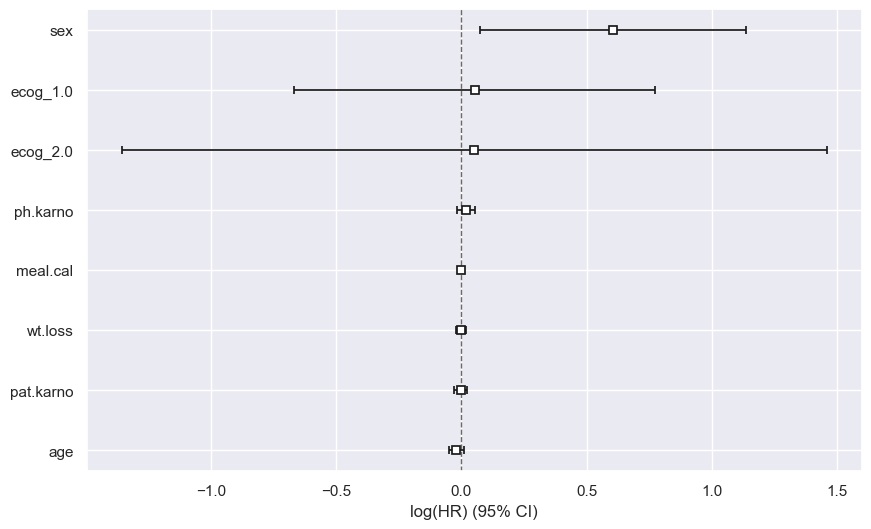

In [79]:
plt.subplots(figsize=(10,6))
cph.plot()
plt.show()

<Axes: >

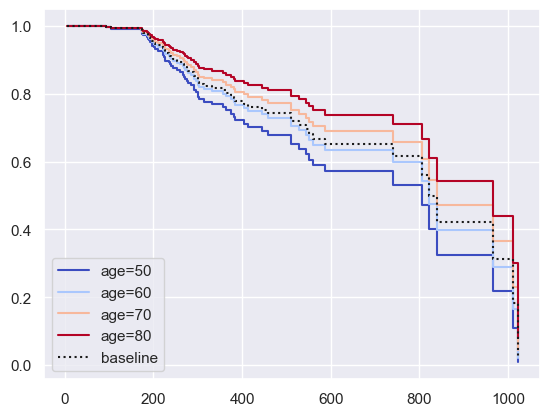

In [80]:
cph.plot_partial_effects_on_outcome(covariates='age', values = [50,60,70,80], cmap = 'coolwarm')

In [82]:
lung_data.head()

,time,status,age,sex,ph.karno,pat.karno,meal.cal,wt.loss,ecog_1.0,ecog_2.0
inst,,,,,,,,,,
3.0,306,0,74,0,90.0,100.0,1175.000000,9.831776,1,0
3.0,455,0,68,0,90.0,90.0,1225.000000,15.000000,0,0
3.0,1010,-1,56,0,90.0,90.0,928.779006,15.000000,0,0
5.0,210,0,57,0,90.0,60.0,1150.000000,11.000000,1,0
1.0,883,0,60,0,100.0,90.0,928.779006,0.000000,0,0


In [84]:
lung_data = lung_data.reset_index(drop=True)
cph.check_assumptions(lung_data, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 226 total observations, 163 right-censored observations>
         test_name = proportional_hazard_test

---
                test_statistic    p  -log2(p)
age       km              0.41 0.52      0.94
          rank            0.66 0.42      1.26
ecog_1.0  km              0.00 0.99      0.01
          rank            0.11 0.74      0.44
ecog_2.0  km              0.03 0.85      0.23
          rank            0.06 0.81      0.30
meal.cal  km              1.18 0.28      1.85
          rank            3.77 0.05      4.26
pat.karno km              0.06 0.81      0.31
          rank            0.00 0.98      0.04
ph.karno  km              0.80 0.37      1.43
          rank            0.47 0.50      1.01
sex       km              0.91 0.34      1.55
          rank            0.61 0.43      1.20
wt.loss   km              1.73 0.19      2.41
          rank            2.76 0.10      3.37



1. Variable 'meal.cal' failed the non-proportional test: p-value is 0.0522.

   Advice 1: the functional form of the variable 'meal.cal' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'meal.cal' using pd.cut, and then specify it in
`strata=['meal.cal', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#

[]

In [86]:
results = proportional_hazard_test(cph,lung_data,time_transform='rank')
results.print_summary(decimals=3, model = 'Untransformed Variables')

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 226 total observations, 163 right-censored observations>
         test_name = proportional_hazard_test

---
           test_statistic    p  -log2(p)
age                  0.66 0.42      1.26
ecog_1.0             0.11 0.74      0.44
ecog_2.0             0.06 0.81      0.30
meal.cal             3.77 0.05      4.26
pat.karno            0.00 0.98      0.04
ph.karno             0.47 0.50      1.01
sex                  0.61 0.43      1.20
wt.loss              2.76 0.10      3.37

### Accelerated Failure Time Model (AFT)

In [90]:
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()

for model in [wb, ex, log, loglogis]:
    model.fit(durations = lung_data['time'], event_observed = lung_data['status'])
    print(f'AIC for {model.__class__.__name__} is {model.AIC_}')

AIC for WeibullFitter is 970.9877884944783
AIC for ExponentialFitter is 1010.5751969715838
AIC for LogNormalFitter is 961.1168967053404
AIC for LogLogisticFitter is 967.5671666134224


In [92]:
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(lung_data, duration_col='time', event_col='status')
weibull_aft.print_summary(3)

<lifelines.WeibullAFTFitter: fitted with 226 total observations, 163 right-censored observations>
             duration col = 'time'
                event col = 'status'
   number of observations = 226
number of events observed = 63
           log-likelihood = -478.562
         time fit was run = 2023-08-04 04:20:11 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ age        0.009      1.009      0.008           -0.006            0.024                0.994                1.024
        ecog_1.0   0.096      1.101      0.179           -0.255            0.447                0.775                1.564
        ecog_2.0   0.200      1.222      0.345           -0.475            0.876                0.622                2.400
        meal.cal   0.000      1.000      0.000           -0.000            0.001                1.000                1.001
        pat.karno -0.000      1.000      0.006           -0.013            0.012                0.987                1.012
        ph.karno  -0.003      0.997      0.008           -0.019            0.014                0.981                1.014
        sex       -0.268      0.765      0.134           -0.530           -0.006                0.588                0.994
        wt.loss    0.001      1.001      0.006           -0.010            0.012                0.990                1.013
        Intercept  6.116    453.004      1.050            4.057            8.175               57.809             3549.839
rho_    Intercept  0.694      2.001      0.092            0.513            0.874                1.671                2.396

                    cmp to      z       p   -log2(p)
param   covariate                                   
lambda_ age          0.000  1.152   0.249      2.004
        ecog_1.0     0.000  0.537   0.592      0.757
        ecog_2.0     0.000  0.581   0.561      0.834
        meal.cal     0.000  1.002   0.316      1.660
        pat.karno    0.000 -0.073   0.942      0.086
        ph.karno     0.000 -0.314   0.753      0.409
        sex          0.000 -2.008   0.045      4.485
        wt.loss      0.000  0.253   0.800      0.322
        Intercept    0.000  5.822 <0.0005     27.361
rho_    Intercept    0.000  7.538 <0.0005     44.247
---
Concordance = 0.569
AIC = 977.124
log-likelihood ratio test = 9.864 on 8 df
-log2(p) of ll-ratio test = 1.864

In [ ]:
print(weibull_aft.median_survival_time_)
print(weibull_aft.mean_survival_time_)

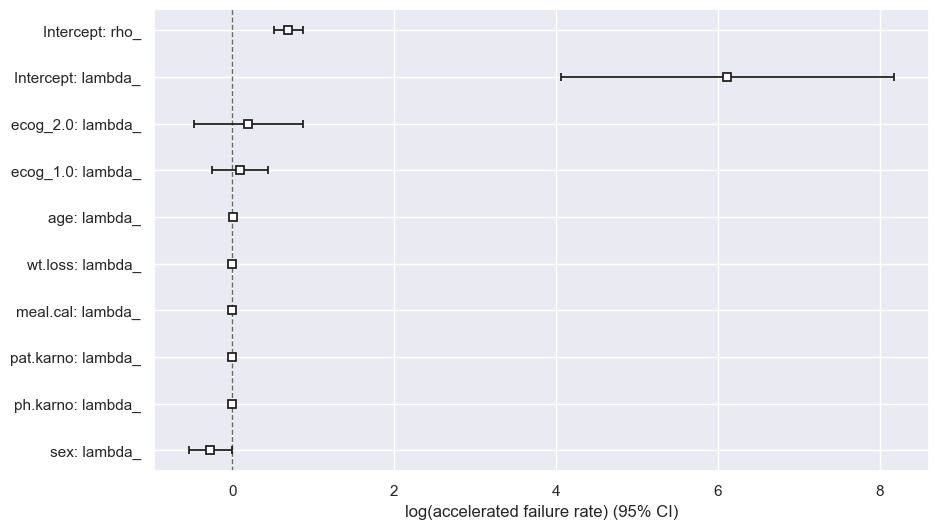

In [94]:
plt.subplots(figsize = (10,6))
weibull_aft.plot()
plt.show()

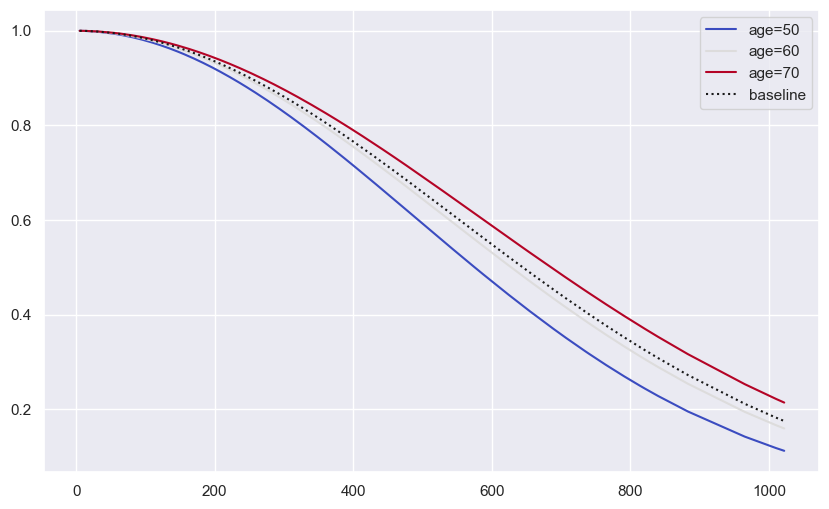

In [96]:
plt.subplots(figsize = (10,6))
weibull_aft.plot_partial_effects_on_outcome('age', range(50,80,10), cmap = 'coolwarm')
plt.show()